## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=sns.load_dataset('avocado')

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data.shape

(18249, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [6]:
#missing values
data.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
## i will rename some columns for more flexibility
data.rename(columns={'AveragePrice':'avprice','Small Bags':'Sbags','Large Bags':'Lbags','XLarge Bags':'XLbags'},inplace=True)

In [8]:
data.head()

,Unnamed: 0,Date,avprice,Total Volume,4046,4225,4770,Total Bags,Sbags,Lbags,XLbags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## AveragePrice analysis

In [9]:
data.avprice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: avprice, dtype: float64

Text(0.5, 1.0, 'Distribution of Average Price')

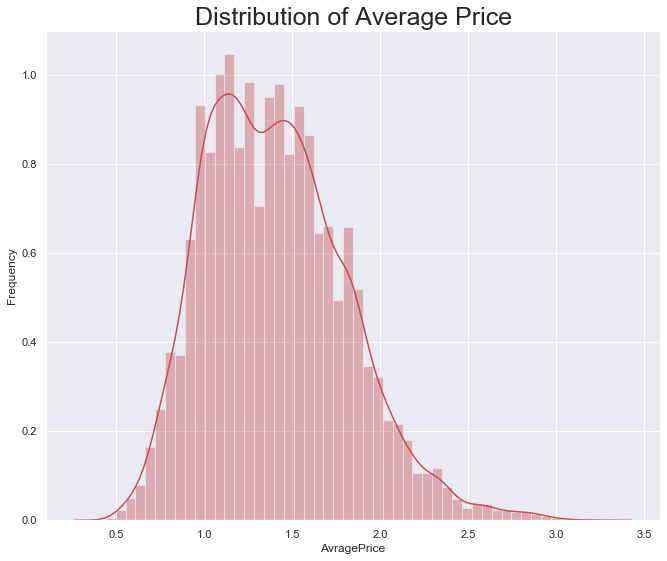

In [10]:
sns.set(style='darkgrid')
plt.figure(figsize=(11,9))
a=sns.distplot(data.avprice,color='r')
a.set_xlabel('AvragePrice')
a.set_ylabel('Frequency')
plt.title('Distribution of Average Price',size=25)


## Totale Volume

In [11]:
data['Total Volume'].describe()

count    1.824900e+04
mean     8.506440e+05
std      3.453545e+06
min      8.456000e+01
25%      1.083858e+04
50%      1.073768e+05
75%      4.329623e+05
max      6.250565e+07
Name: Total Volume, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Volume')

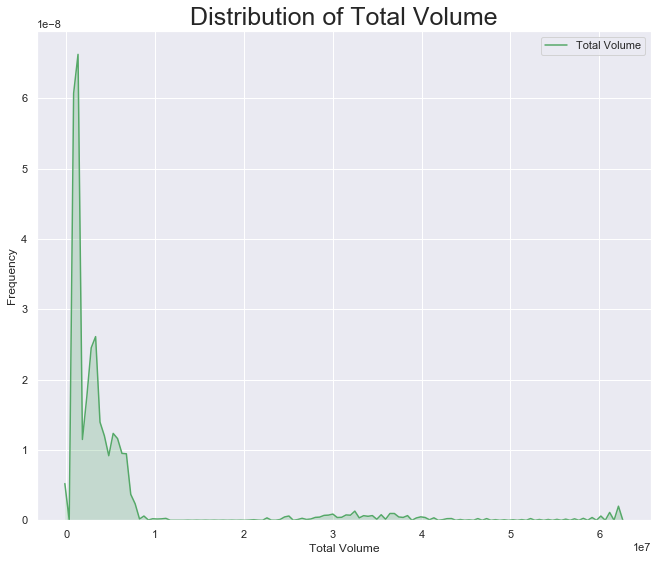

In [12]:
plt.figure(figsize=(11,9))
a=sns.kdeplot(data['Total Volume'],color='g',shade=True)
a.set_xlabel('Total Volume')
a.set_ylabel('Frequency')
plt.title('Distribution of Total Volume',size=25)


In [13]:
data[data['Total Volume']<1500000].shape

(16500, 14)

In [14]:
data[data['Total Volume']>5000000].sort_values(by='Total Volume',ascending=False)

,Unnamed: 0,Date,avprice,Total Volume,4046,4225,4770,Total Bags,Sbags,Lbags,XLbags,type,year,region
9097,7,2018-02-04,0.87,62505646.52,21620180.90,20445501.03,1066830.22,19373134.37,13384586.80,5719096.61,269450.96,conventional,2018,TotalUS
8366,47,2017-02-05,0.77,61034457.10,22743616.17,20328161.55,1664383.09,16298296.29,12567155.58,3618270.75,112869.96,conventional,2017,TotalUS
5506,46,2016-02-07,0.76,52288697.89,16573573.78,20470572.61,2546439.11,12698112.39,9083373.04,3373077.87,241661.48,conventional,2016,TotalUS
8353,34,2017-05-07,1.09,47293921.60,17076650.82,13549102.59,863471.88,15804696.31,11228049.63,4324231.19,252415.49,conventional,2017,TotalUS
5493,33,2016-05-08,0.82,46324529.70,14223304.98,17896391.60,1993645.36,12211187.76,8747756.84,3342780.83,120650.09,conventional,2016,TotalUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,8,2015-11-01,0.90,5024858.14,1815066.15,1937479.91,132883.59,1139428.49,717110.41,421675.08,643.00,conventional,2015,West
8374,2,2017-12-17,1.05,5007523.13,1786351.75,1225289.22,80134.21,1915747.95,1083960.19,820156.22,11631.54,conventional,2017,West
7202,49,2017-01-22,1.39,5007356.22,206778.67,3425747.61,319052.61,1055777.33,978886.09,68710.32,8180.92,conventional,2017,Northeast
5160,12,2016-10-02,1.01,5006659.75,2488198.80,1053485.59,17352.41,1447622.95,1091904.20,338402.33,17316.42,conventional,2016,SouthCentral


In [15]:
## correlation between them 
print('the correlation between AveragePrice and Total volume :',data['avprice'].corr(data['Total Volume']))

the correlation between AveragePrice and Total volume : -0.19275238715271914


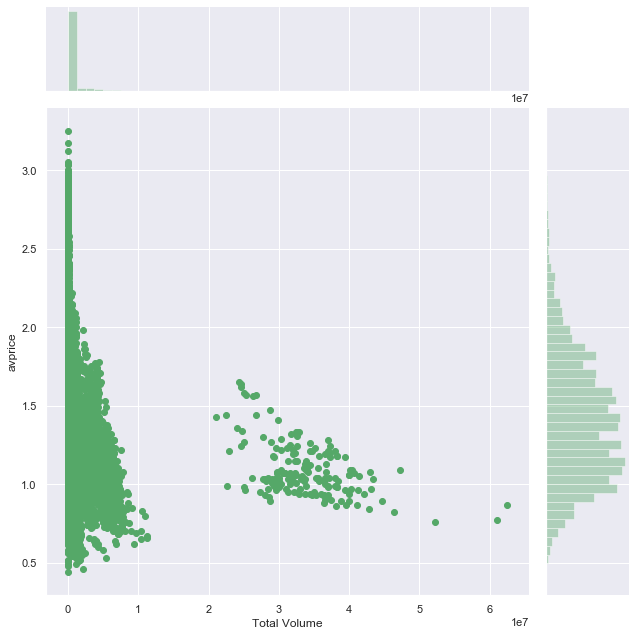

In [16]:
a=sns.jointplot(x='Total Volume',y='avprice',data=data,color='g',height=9)


Text(0.5, 1.0, 'Average Price vs Total Volume')

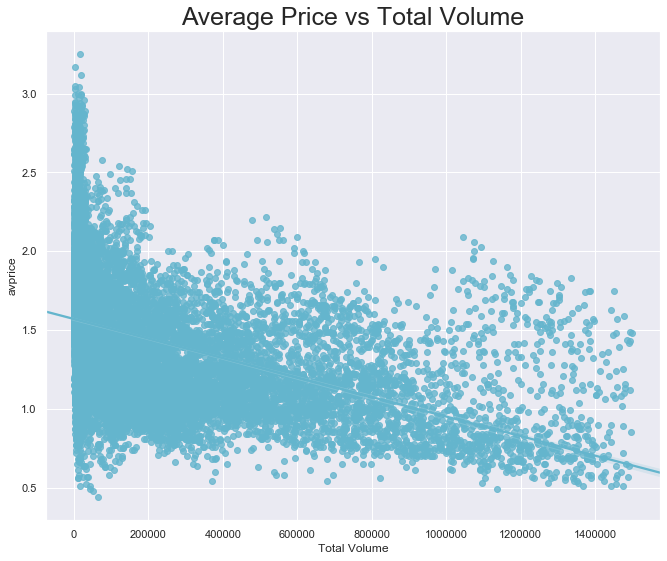

In [17]:
plt.figure(figsize=(11,9))
a=sns.regplot(x='Total Volume',y='avprice',data=data[data['Total Volume']<1500000],color='c')
plt.title('Average Price vs Total Volume',size=25)

## Results :

## Region

In [18]:
data.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [19]:
Region=data.groupby('region').avprice.mean().reset_index().sort_values(by='avprice')


In [20]:
Region.head()

,region,avprice
18,Houston,1.047929
11,DallasFtWorth,1.085592
45,SouthCentral,1.101243
9,CincinnatiDayton,1.209201
26,Nashville,1.212101


In [21]:
Region.tail()

,region,avprice
40,Sacramento,1.621568
32,Philadelphia,1.632130
28,NewYork,1.727574
42,SanFrancisco,1.804201
17,HartfordSpringfield,1.818639


Text(0.5, 1.0, 'Boxplot AveragePrice Vs Region')

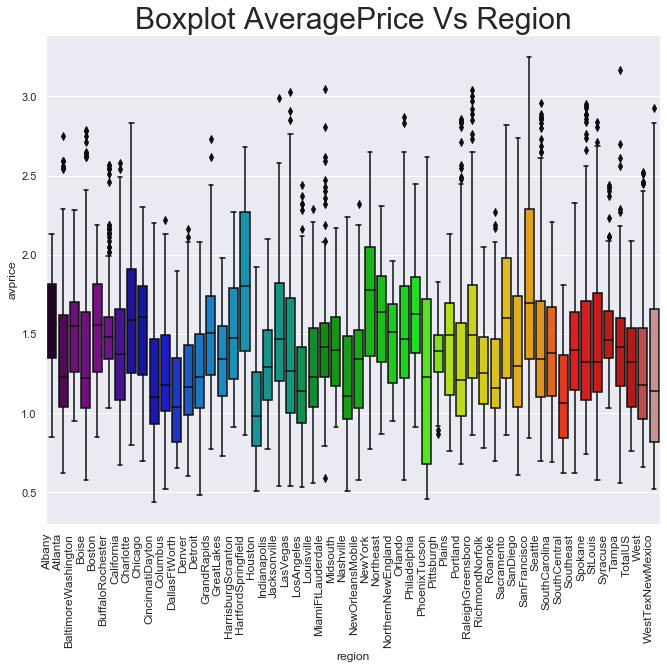

In [22]:
plt.figure(figsize=(11,9))
a=sns.boxplot(x='region',y='avprice',data=data,palette='nipy_spectral')
a.set_xticklabels(a.get_xticklabels(), rotation=90, ha="right",size=12)
plt.title('Boxplot AveragePrice Vs Region',size=30)

## Results :

## Type

In [23]:
data.type.unique()

array(['conventional', 'organic'], dtype=object)

In [24]:
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [25]:
data.groupby('type').avprice.mean().reset_index()

,type,avprice
0,conventional,1.158040
1,organic,1.653999


Text(0.5, 1, 'Boxen plot of AverigePrive for each type')

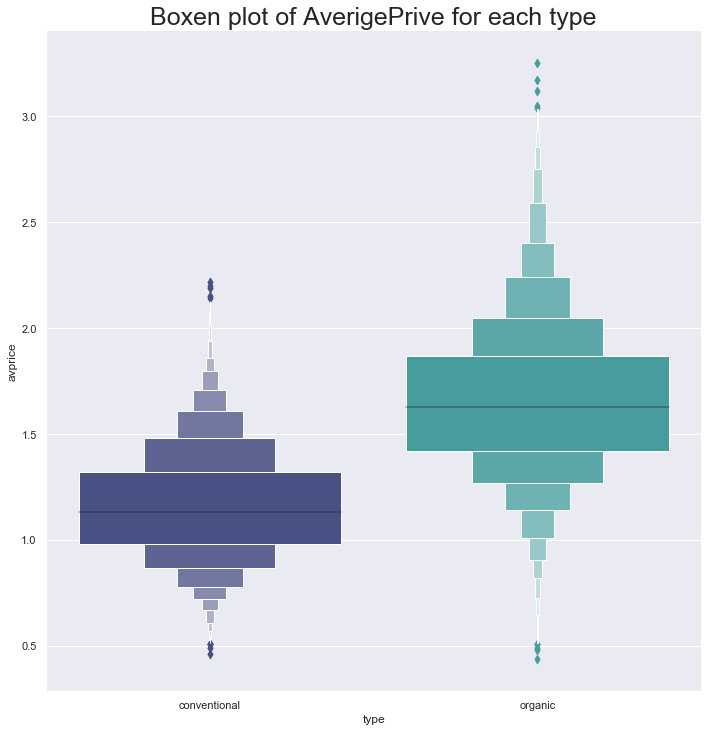

In [72]:
a=sns.catplot(x='type',y='avprice',data=data,palette='mako',height=10,kind='boxen')
plt.title('Boxen plot of AverigePrive for each type',size=25)

Text(0.5, 1, 'Boxen plot of Total Volume for each type')

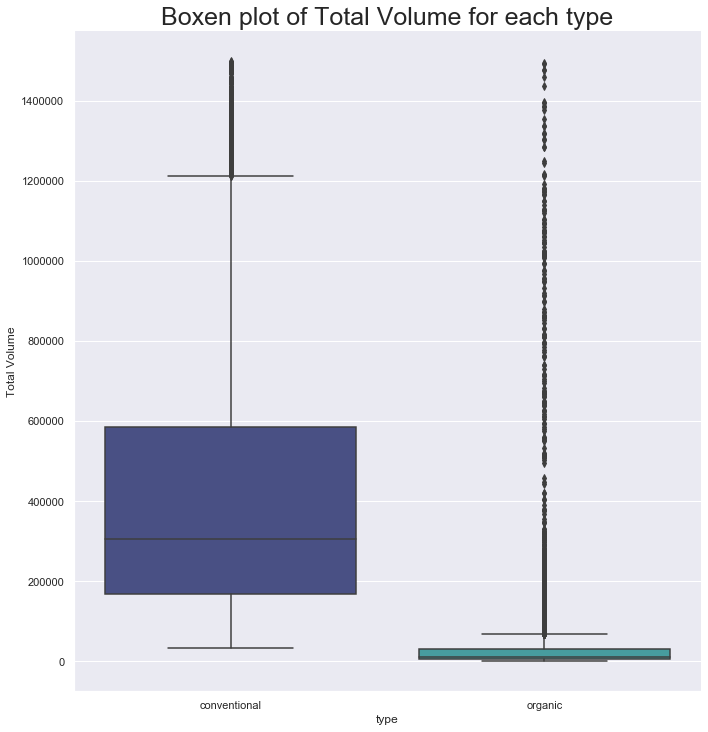

In [73]:
a=sns.catplot(x='type',y='Total Volume',data=data[data['Total Volume']<1500000],palette='mako',height=10,kind='box')
plt.title('Boxen plot of Total Volume for each type',size=25)

Text(0.5, 1, 'AveragePrice Vs Total Volume for each type')

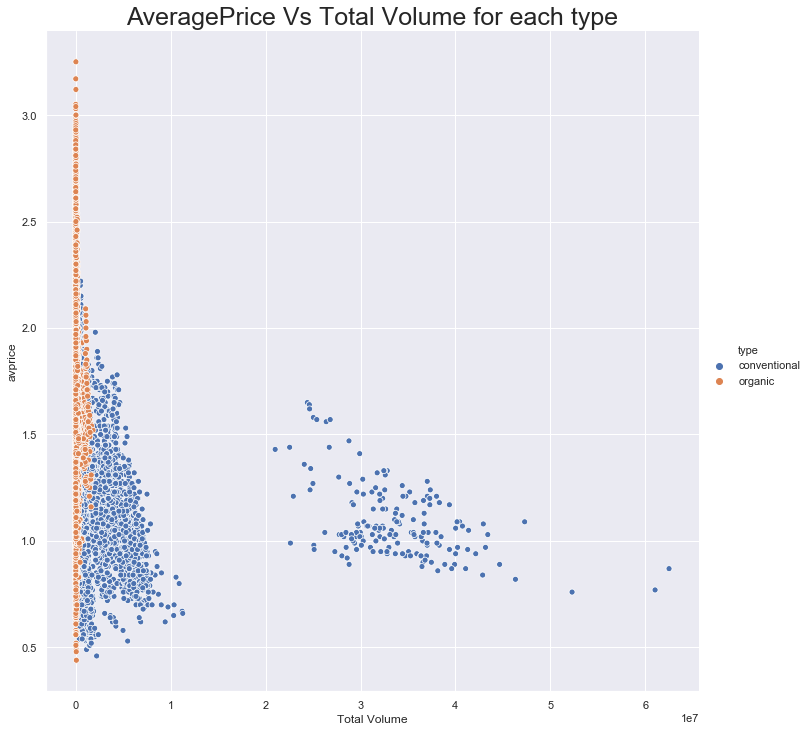

In [76]:
sns.relplot(x="Total Volume",y='avprice',hue='type',data=data,height=10)
plt.title('AveragePrice Vs Total Volume for each type',size=25)

Text(0.5, 1.0, 'Barplot AveragePrice Vs Region for each Type')

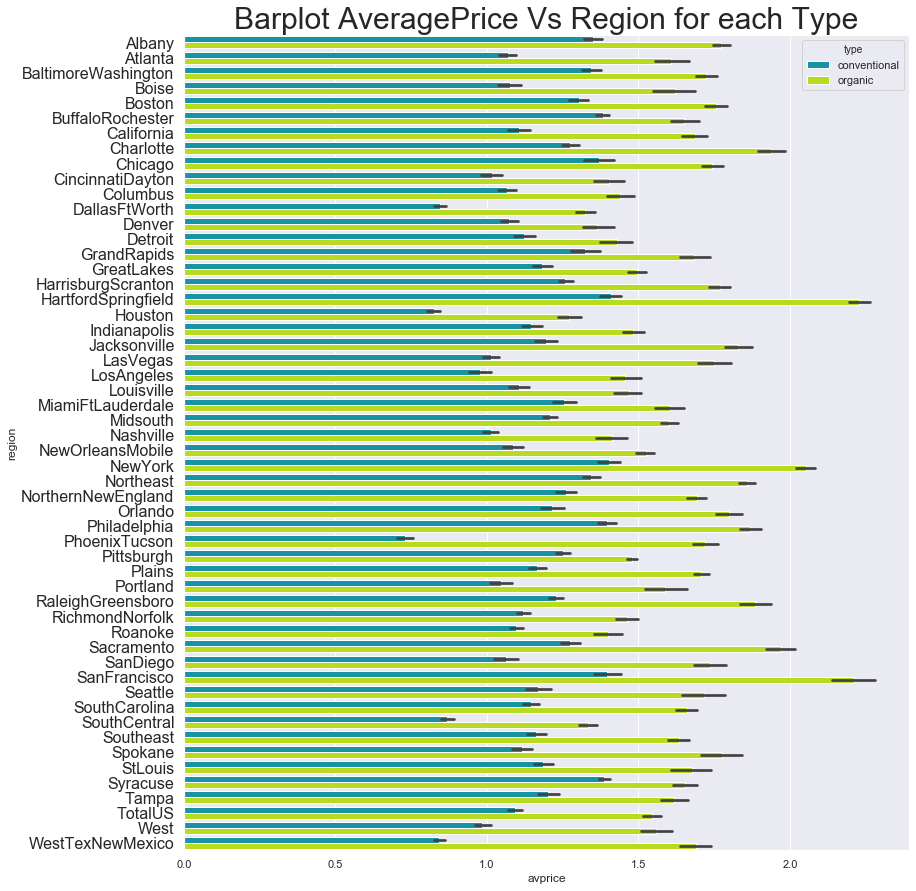

In [122]:
plt.figure(figsize=(13,15))
a=sns.barplot(x='avprice',y='region',data=data,palette='nipy_spectral',hue='type')
a.set_yticklabels(a.get_yticklabels(),size=16)
plt.title('Barplot AveragePrice Vs Region for each Type',size=30)

Text(0.5, 1.0, 'Total Volume for organic for each Region')

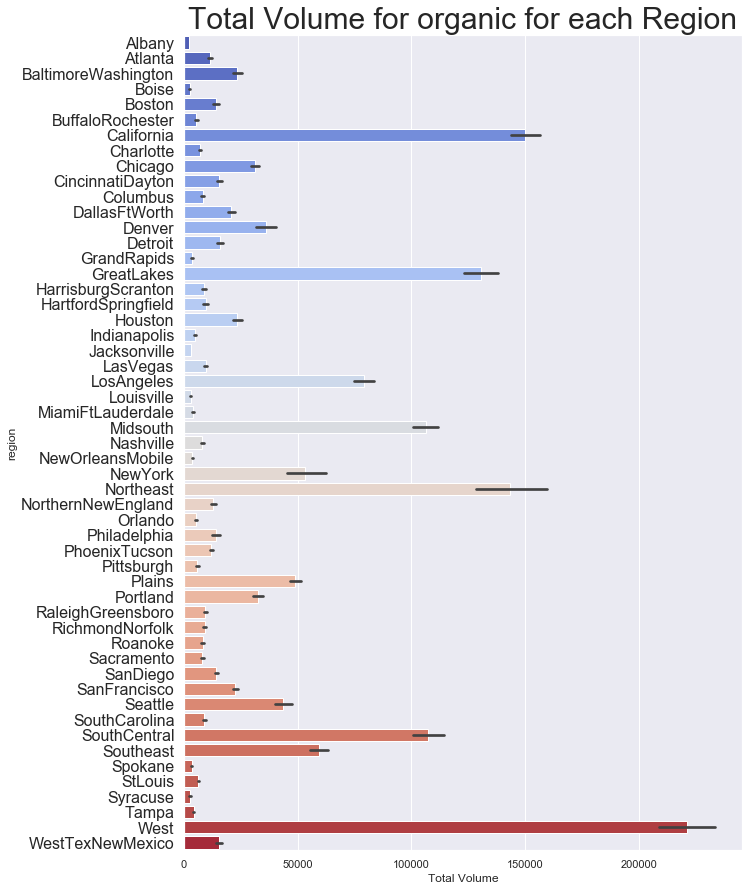

In [86]:
plt.figure(figsize=(10,15))
a=sns.barplot(x='Total Volume',y='region',data=data[data.type=='organic'].query('region != "TotalUS"'),palette='coolwarm')
a.set_yticklabels(a.get_yticklabels(),size=16)
plt.title('Total Volume for organic for each Region',size=30)

Text(0.5, 1.0, 'Total Volume for conventional for each Region')

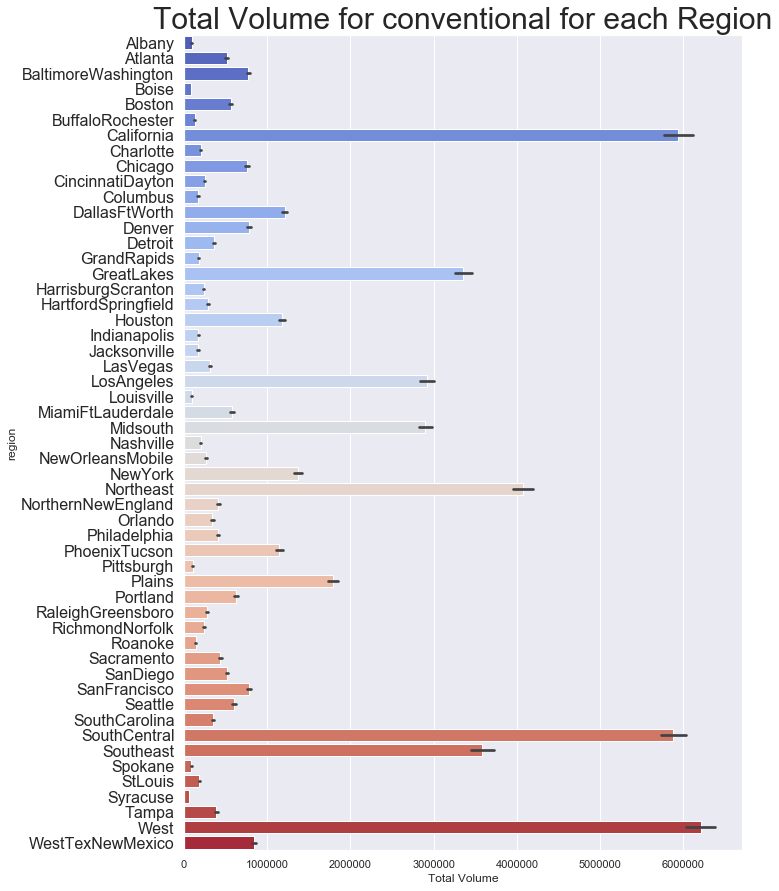

In [87]:
plt.figure(figsize=(10,15))
a=sns.barplot(x='Total Volume',y='region',data=data[data.type=='conventional'].query('region != "TotalUS"'),palette='coolwarm')
a.set_yticklabels(a.get_yticklabels(),size=16)
plt.title('Total Volume for conventional for each Region',size=30)

## Results :

## Year

In [49]:
data.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [94]:
data.Date=pd.to_datetime(data.Date)

In [209]:
data['month']=data.Date.dt.month

In [220]:
price_years=data.groupby(['year','month','type'],as_index=False)['avprice'].mean()
price_years

,year,month,type,avprice
0,2015,1,conventional,1.092454
1,2015,1,organic,1.637639
2,2015,2,conventional,1.055324
3,2015,2,organic,1.598565
4,2015,3,conventional,1.089889
...,...,...,...,...
73,2018,1,organic,1.593241
74,2018,2,conventional,1.071389
75,2018,2,organic,1.566019
76,2018,3,conventional,1.130648


## Let's see the mean of AveragePrice each month over  years

##  2015

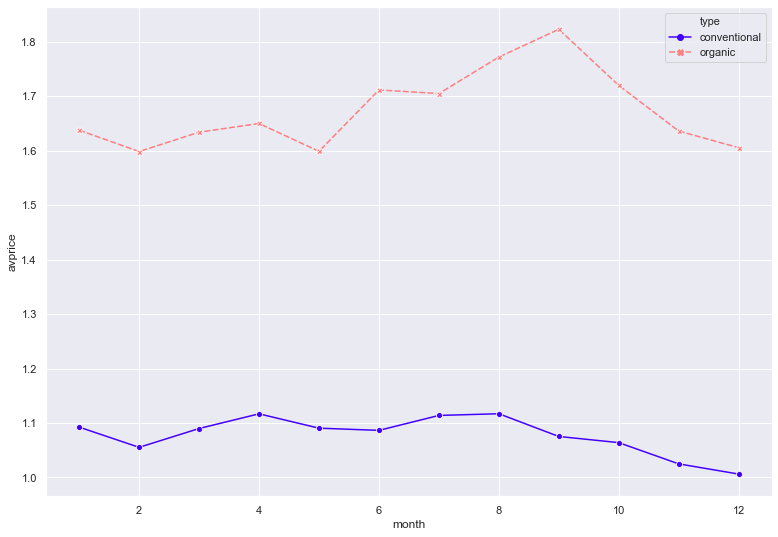

In [223]:
plt.figure(figsize=(13,9))
a=sns.lineplot(x='month',y='avprice',data=price_years.query('year=="2015"')
            ,hue='type',markers=True,style='type'
            ,palette='gnuplot2' )

## 2016

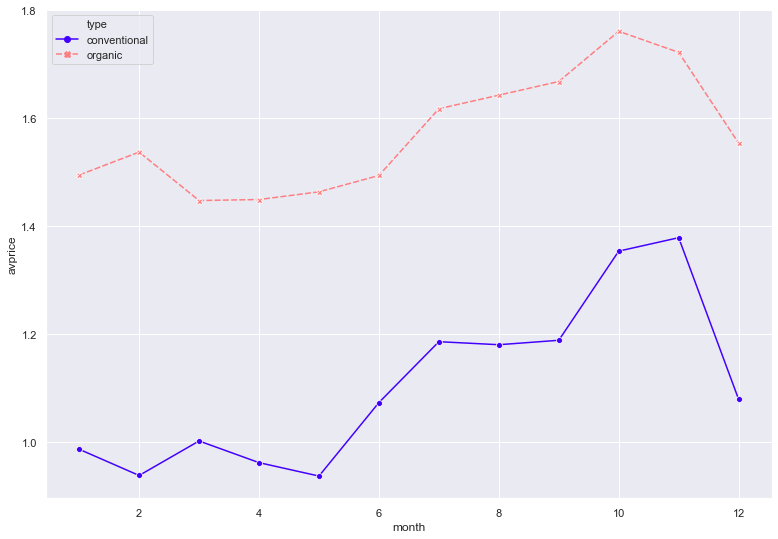

In [224]:
plt.figure(figsize=(13,9))
a=sns.lineplot(x='month',y='avprice',data=price_years.query('year=="2016"')
            ,hue='type',markers=True,style='type'
            ,palette='gnuplot2' )

# 2017

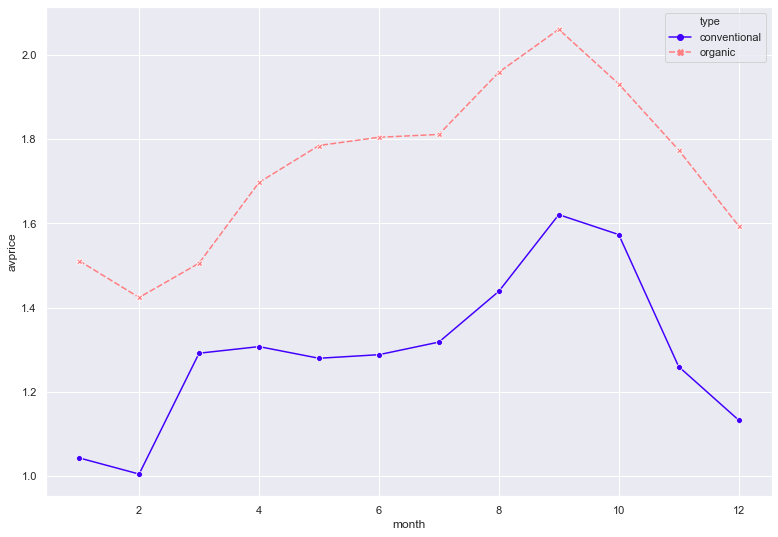

In [225]:
plt.figure(figsize=(13,9))
a=sns.lineplot(x='month',y='avprice',data=price_years.query('year=="2017"')
            ,hue='type',markers=True,style='type'
            ,palette='gnuplot2' )

## 2018

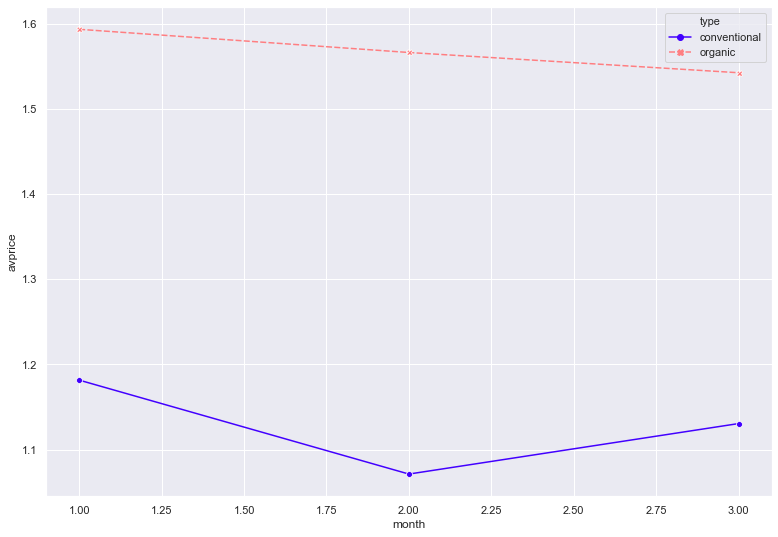

In [226]:
plt.figure(figsize=(13,9))
a=sns.lineplot(x='month',y='avprice',data=price_years.query('year=="2018"')
            ,hue='type',markers=True,style='type'
            ,palette='gnuplot2' )

## Results :

## Averge Pice of Avocado for each Region over the four years

Text(0.5, 1, 'For Conventional')

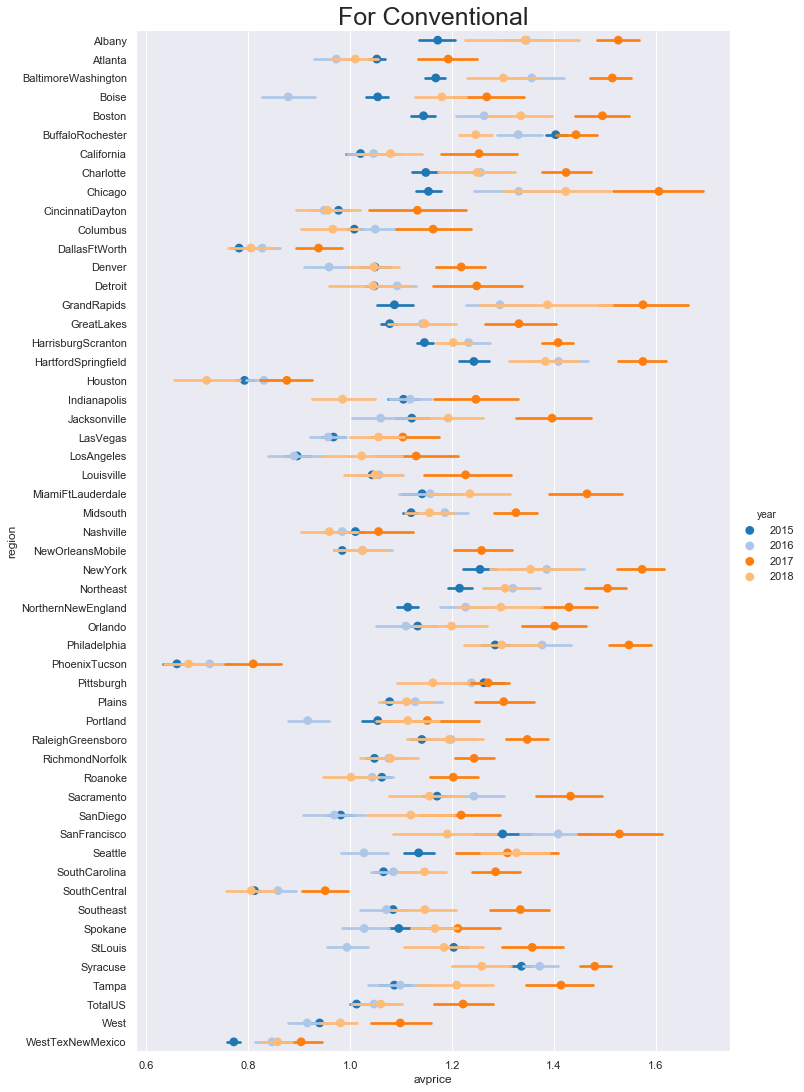

In [236]:
sns.factorplot('avprice','region',data=data.query("type=='conventional'"),
                hue='year',
                size=15,
                palette='tab20',
                join=False,
                aspect=0.7,
              )
plt.title('For Conventional',size=25)

Text(0.5, 1, 'For Organic')

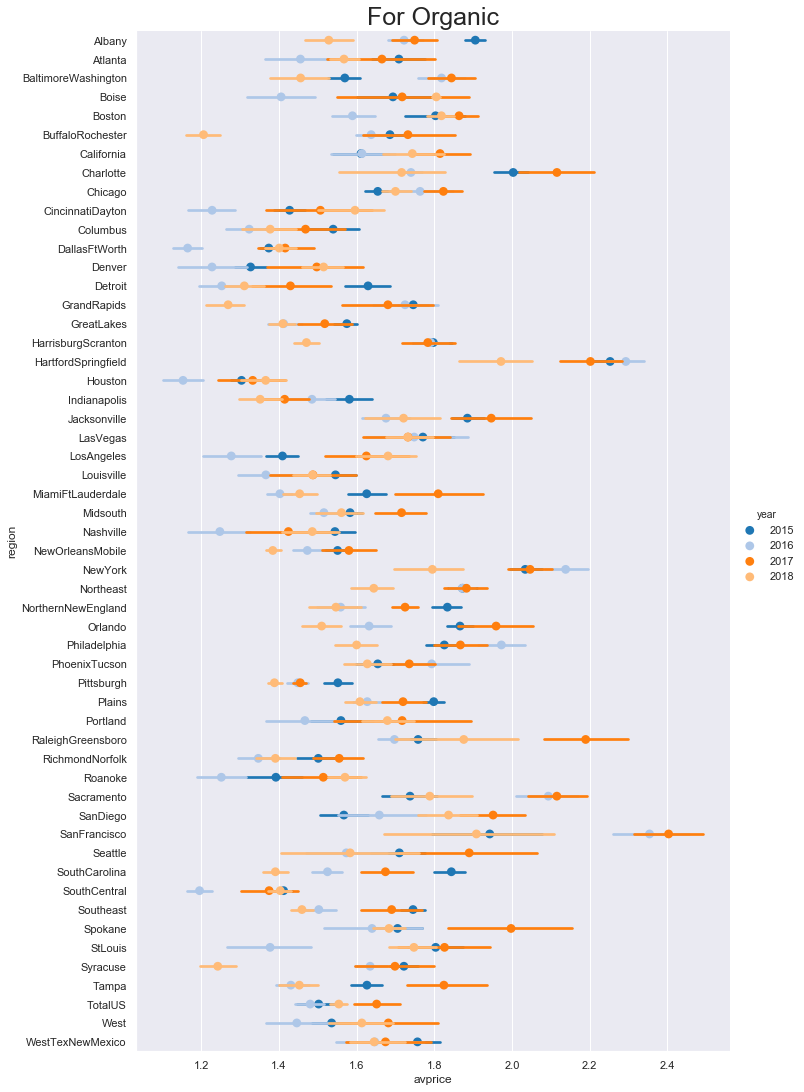

In [237]:
sns.factorplot('avprice','region',data=data.query("type=='organic'"),
                hue='year',
                size=15,
                palette='tab20',
                join=False,
                aspect=0.7,
              )
plt.title('For Organic',size=25)

## Results :

### !!! Thank you waiting for your remarks